In [22]:
# prompt: import a folder name src from drive and load all images in this folder

from google.colab import drive
import os
from PIL import Image
import numpy as np

drive.mount('/content/drive')

# Replace 'path/to/your/src' with the actual path to your src folder in Google Drive
filename = '/content/drive/MyDrive/src/Screenshot 2024-09-27 at 3.40.22 PM.png'



# Now you can access the loaded images in the 'image_list' list.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Loaded filename images from the src folder.


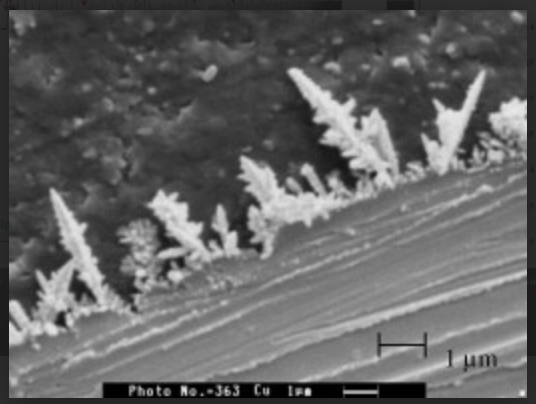

In [25]:
# prompt: show the image with name filename

try:
  img = Image.open(filename)
  display(img)
except FileNotFoundError:
  print(f"File not found: {filename}")
except Exception as e:
  print(f"An error occurred: {e}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


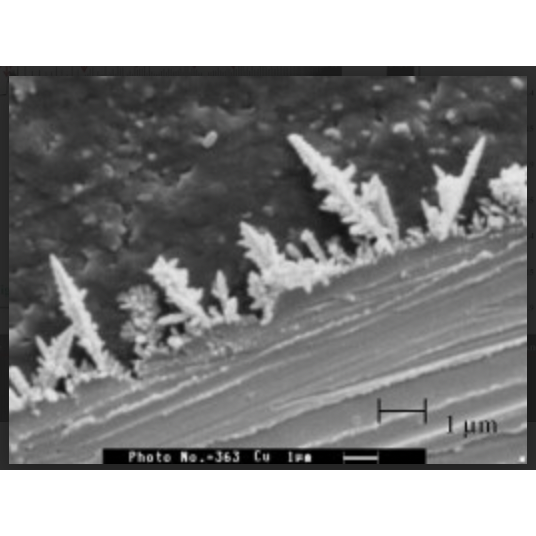

In [27]:
from google.colab import drive
import os
from PIL import Image
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Step 1: Mount Google Drive to access the image file
drive.mount('/content/drive')

# Path to the image in Google Drive
filename = '/content/drive/MyDrive/src/Screenshot 2024-09-27 at 3.40.22 PM.png'

try:
    # Step 2: Open the image file
    img = Image.open(filename)

    # Get the dimensions of the image
    width, height = img.size

    # Calculate the maximum dimension for resizing to a square
    max_dimension = max(width, height)

    # Create a new square image with a white background
    new_img = Image.new('RGB', (max_dimension, max_dimension), (255, 255, 255))

    # Center the original image in the new square image
    paste_x = (max_dimension - width) // 2
    paste_y = (max_dimension - height) // 2
    new_img.paste(img, (paste_x, paste_y))

    # Display the resized image
    display(new_img)

    # Convert the resized image to a numpy array and normalize pixel values
    img_array = np.array(new_img) / 255.0

    # Step 3: Define the edge detection model (a simple CNN with one convolutional layer)
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(filters=1, kernel_size=(3, 3), activation='relu', input_shape=(max_dimension, max_dimension, 3))
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='mse')

    # Train the model on the same image as both input and output to detect edges
    model.fit(np.expand_dims(img_array, axis=0), np.expand_dims(img_array, axis=0), epochs=10)

    # Predict edges in the image
    edge_detected_img = model.predict(np.expand_dims(img_array, axis=0))[0]

    # Display the original resized image and the edge-detected result
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(img_array)
    plt.title('Original Image (Resized to Square)')

    plt.subplot(1, 2, 2)
    plt.imshow(edge_detected_img[:, :, 0], cmap='gray')  # Display only the single channel output
    plt.title('Edge Detected Image')
    plt.show()

except FileNotFoundError:
    print(f"File not found: {filename}")
except Exception as e:
    print(f"An error occurred: {e}")


In [30]:
from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf

# Step 1: Mount Google Drive
drive.mount('/content/drive')

# Path to the image in Google Drive
filename = '/content/drive/MyDrive/src/Screenshot 2024-09-27 at 3.40.22 PM.png'

try:
    # Step 2: Load the image
    img = Image.open(filename).convert('L')  # Convert to grayscale
    img = img.resize((256, 256))  # Resize to a fixed size for consistent processing
    img_array = np.array(img) / 255.0  # Normalize pixel values

    # Step 3: Prepare the image for the model
    img_array = np.expand_dims(img_array, axis=(0, -1))  # Add batch and channel dimensions

    # Define the Sobel edge detection filters
    sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype=np.float32)
    sobel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], dtype=np.float32)

    # Reshape filters to match TensorFlow's expected shape for Conv2D (filter_height, filter_width, in_channels, out_channels)
    sobel_x = sobel_x.reshape((3, 3, 1, 1))
    sobel_y = sobel_y.reshape((3, 3, 1, 1))

    # Create a TensorFlow model for edge detection
    input_img = tf.keras.layers.Input(shape=(256, 256, 1))
    edge_x = tf.keras.layers.Conv2D(1, (3, 3), padding='same', use_bias=False, kernel_initializer=tf.constant_initializer(sobel_x))(input_img)
    edge_y = tf.keras.layers.Conv2D(1, (3, 3), padding='same', use_bias=False, kernel_initializer=tf.constant_initializer(sobel_y))(input_img)

    # Combine edges
    edges = tf.sqrt(tf.square(edge_x) + tf.square(edge_y))
    model = tf.keras.models.Model(inputs=input_img, outputs=edges)

    # Apply the edge detection filter
    edge_detected_img = model.predict(img_array)[0, :, :, 0]  # Remove batch and channel dimensions for display

    # Display the original and edge-detected images
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(edge_detected_img, cmap='gray')
    plt.title('Edge Detected Image')
    plt.axis('off')

    plt.show()

except FileNotFoundError:
    print(f"File not found: {filename}")
except Exception as e:
    print(f"An error occurred: {e}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
An error occurred: A KerasTensor cannot be used as input to a TensorFlow function. A KerasTensor is a symbolic placeholder for a shape and dtype, used when constructing Keras Functional models or Keras Functions. You can only use it as input to a Keras layer or a Keras operation (from the namespaces `keras.layers` and `keras.operations`). You are likely doing something like:

```
x = Input(...)
...
tf_fn(x)  # Invalid.
```

What you should do instead is wrap `tf_fn` in a layer:

```
class MyLayer(Layer):
    def call(self, x):
        return tf_fn(x)

x = MyLayer()(x)
```



Mounted at /content/drive
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


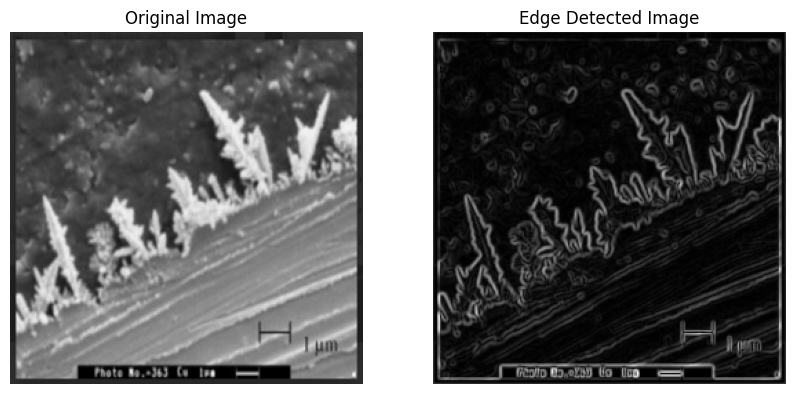

In [31]:
from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
from tensorflow.keras.layers import Layer, Input, Conv2D
from tensorflow.keras.models import Model

# Mount Google Drive
drive.mount('/content/drive', force_remount=True)

# Path to the image in Google Drive
filename = '/content/drive/MyDrive/src/Screenshot 2024-09-27 at 3.40.22 PM.png'

class EdgeDetectionLayer(Layer):
    def __init__(self, **kwargs):
        super(EdgeDetectionLayer, self).__init__(**kwargs)
        # Define Sobel filters for edge detection
        sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype=np.float32)
        sobel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], dtype=np.float32)
        sobel_x = sobel_x.reshape((3, 3, 1, 1))
        sobel_y = sobel_y.reshape((3, 3, 1, 1))

        # Create TensorFlow variables for Sobel filters
        self.sobel_x = tf.constant_initializer(sobel_x)
        self.sobel_y = tf.constant_initializer(sobel_y)

    def build(self, input_shape):
        # Define two convolutional layers to apply Sobel filters
        self.conv_x = Conv2D(1, (3, 3), padding='same', use_bias=False, kernel_initializer=self.sobel_x)
        self.conv_y = Conv2D(1, (3, 3), padding='same', use_bias=False, kernel_initializer=self.sobel_y)

    def call(self, inputs):
        # Apply Sobel filters to detect edges
        edge_x = self.conv_x(inputs)
        edge_y = self.conv_y(inputs)
        # Calculate the edge magnitude
        edges = tf.sqrt(tf.square(edge_x) + tf.square(edge_y))
        return edges

try:
    # Load and preprocess the image
    img = Image.open(filename).convert('L')  # Convert to grayscale
    img = img.resize((256, 256))  # Resize for consistent processing
    img_array = np.array(img) / 255.0  # Normalize pixel values
    img_array = np.expand_dims(img_array, axis=(0, -1))  # Add batch and channel dimensions

    # Define the model
    input_img = Input(shape=(256, 256, 1))
    edges = EdgeDetectionLayer()(input_img)
    model = Model(inputs=input_img, outputs=edges)

    # Get edge-detected output
    edge_detected_img = model.predict(img_array)[0, :, :, 0]  # Remove batch and channel dimensions for display

    # Display the original and edge-detected images
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(edge_detected_img, cmap='gray')
    plt.title('Edge Detected Image')
    plt.axis('off')

    plt.show()

except FileNotFoundError:
    print(f"File not found: {filename}")
except Exception as e:
    print(f"An error occurred: {e}")


In [32]:
from google.colab import drive
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Step 1: Mount Google Drive to access the dataset
drive.mount('/content/drive')



# Step 2: Load and preprocess the data
# Initialize the ImageDataGenerator for training and validation data with data augmentation
datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2
)

# Load training data
train_data = datagen.flow_from_directory(
    image_folder_path,
    target_size=(128, 128),  # Resize images for input to the model
    batch_size=32,
    class_mode='binary',
    subset='training'
)

# Load validation data
validation_data = datagen.flow_from_directory(
    image_folder_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

# Step 3: Define the CNN model for dendrite detection
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 4: Train the model
history = model.fit(
    train_data,
    validation_data=validation_data,
    epochs=10
)

# Step 5: Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Step 6: Save the trained model
model.save('/content/dendrite_detection_model.h5')
print("Model saved as 'dendrite_detection_model.h5'")

# Step 7: Detect dendrites in a new image
def detect_dendrite(image_path, model):
    # Load and preprocess the image
    img = Image.open(image_path)
    img = img.resize((128, 128))
    img_array = np.array(img) / 255.0  # Normalize
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Make prediction
    prediction = model.predict(img_array)[0][0]

    # Determine the class based on the prediction
    if prediction > 0.5:
        print("Dendrite detected with confidence:", prediction)
    else:
        print("No dendrite detected with confidence:", 1 - prediction)

# Test with a sample image
sample_image_path = '/content/drive/MyDrive/src/Screenshot 2024-09-27 at 3.40.22 PM.png'  # Replace with your test image
detect_dendrite(sample_image_path, model)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.


ValueError: Must provide at least one structure

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

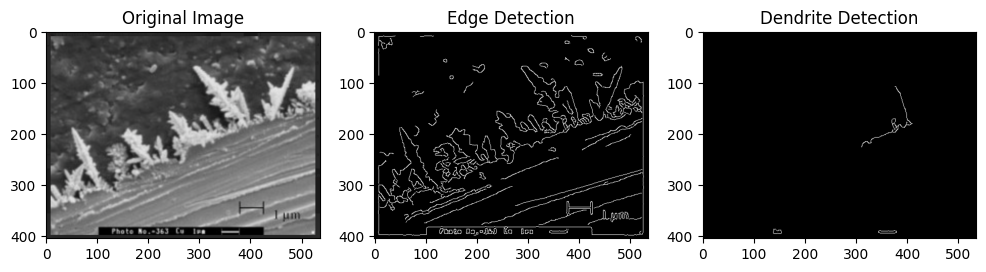

In [33]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = '/Screenshot 2024-09-27 at 3.40.22 PM.png'
img = cv2.imread(image_path)

# Step 1: Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Step 2: Apply Gaussian Blurring to reduce noise
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Step 3: Apply Canny Edge Detection
edges = cv2.Canny(blurred, threshold1=50, threshold2=150)

# Step 4: Find contours based on edges detected
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Step 5: Draw contours that match typical dendrite characteristics
# Create a blank canvas to draw the contours
dendrite_detected = np.zeros_like(img)

for contour in contours:
    # Filter contours by area to ignore small noise
    area = cv2.contourArea(contour)
    if 100 < area < 2000:  # Adjust area thresholds based on the dendrite size
        # Optionally, we can further filter by contour shape or aspect ratio
        cv2.drawContours(dendrite_detected, [contour], -1, (255, 255, 255), 1)

# Display the results
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

plt.subplot(1, 3, 2)
plt.title("Edge Detection")
plt.imshow(edges, cmap='gray')

plt.subplot(1, 3, 3)
plt.title("Dendrite Detection")
plt.imshow(cv2.cvtColor(dendrite_detected, cv2.COLOR_BGR2RGB))

plt.show()


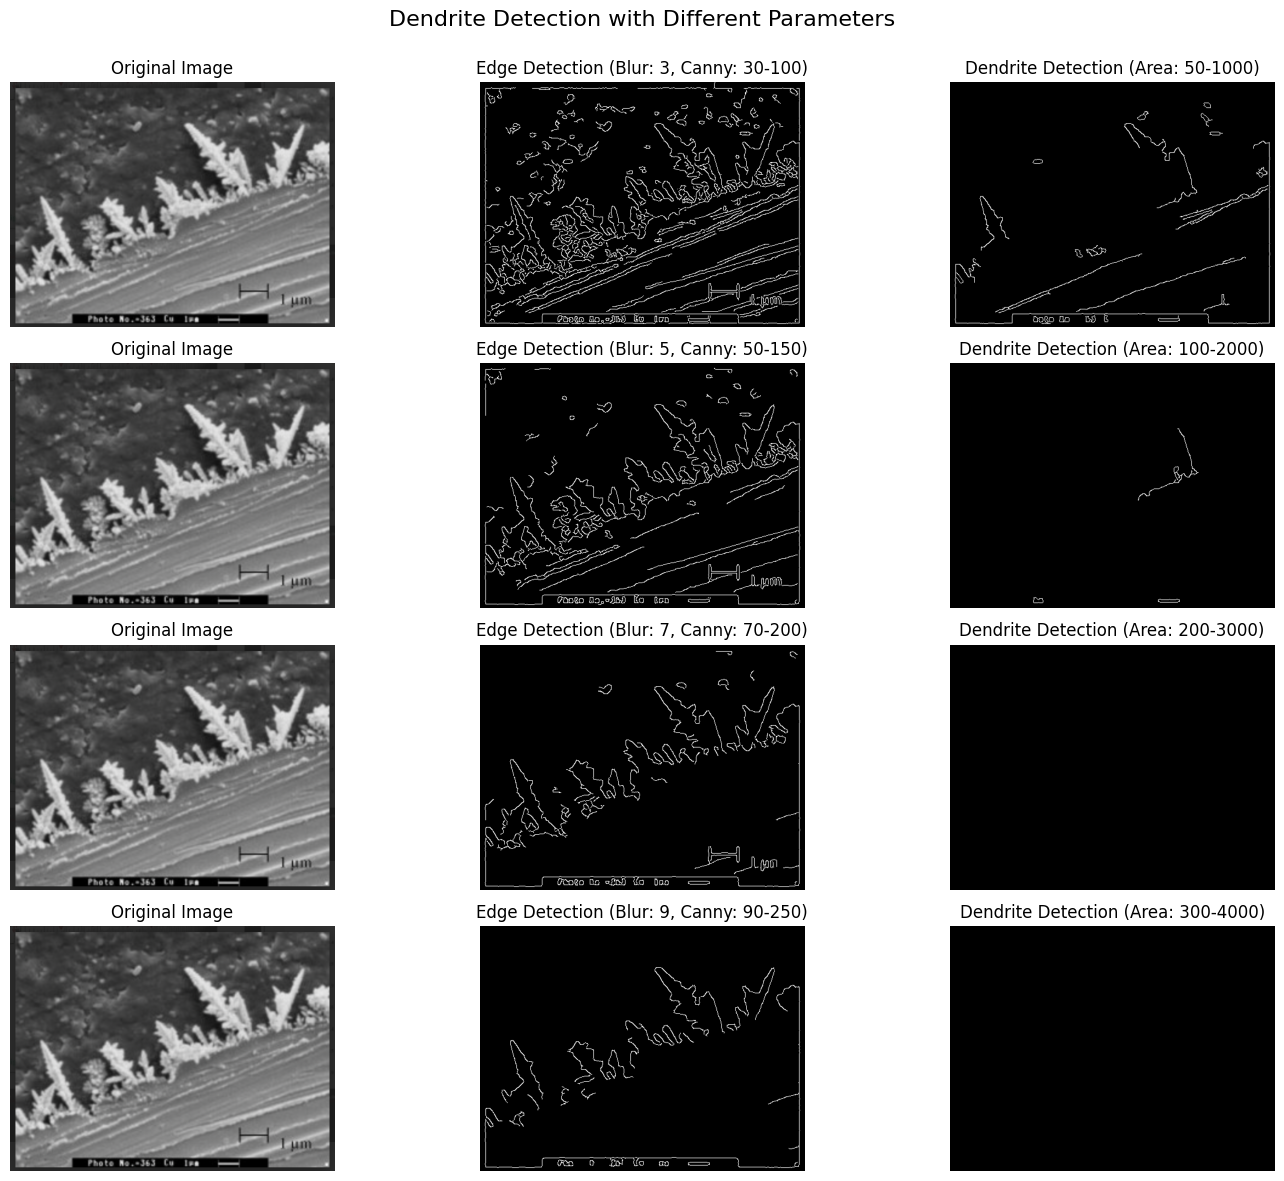

In [35]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = '/Screenshot 2024-09-27 at 3.40.22 PM.png'
img = cv2.imread(image_path)

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Set up different parameter configurations for testing
params = [
    {'blur_kernel': 3, 'canny_thresh1': 30, 'canny_thresh2': 100, 'min_area': 50, 'max_area': 1000},
    {'blur_kernel': 5, 'canny_thresh1': 50, 'canny_thresh2': 150, 'min_area': 100, 'max_area': 2000},
    {'blur_kernel': 7, 'canny_thresh1': 70, 'canny_thresh2': 200, 'min_area': 200, 'max_area': 3000},
    {'blur_kernel': 9, 'canny_thresh1': 90, 'canny_thresh2': 250, 'min_area': 300, 'max_area': 4000}
]

# Set up plot
fig, axs = plt.subplots(len(params), 3, figsize=(15, 12))
fig.suptitle("Dendrite Detection with Different Parameters", fontsize=16)

# Apply different configurations
for i, param in enumerate(params):
    # Apply Gaussian Blurring
    blurred = cv2.GaussianBlur(gray, (param['blur_kernel'], param['blur_kernel']), 0)

    # Apply Canny Edge Detection
    edges = cv2.Canny(blurred, threshold1=param['canny_thresh1'], threshold2=param['canny_thresh2'])

    # Find contours based on edges detected
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw contours that match typical dendrite characteristics
    dendrite_detected = np.zeros_like(img)
    for contour in contours:
        area = cv2.contourArea(contour)
        if param['min_area'] < area < param['max_area']:  # Filter contours by area
            cv2.drawContours(dendrite_detected, [contour], -1, (255, 255, 255), 1)

    # Plot original, edge detection, and dendrite detection for each parameter set
    axs[i, 0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    axs[i, 0].set_title(f"Original Image")
    axs[i, 0].axis('off')

    axs[i, 1].imshow(edges, cmap='gray')
    axs[i, 1].set_title(f"Edge Detection (Blur: {param['blur_kernel']}, Canny: {param['canny_thresh1']}-{param['canny_thresh2']})")
    axs[i, 1].axis('off')

    axs[i, 2].imshow(cv2.cvtColor(dendrite_detected, cv2.COLOR_BGR2RGB))
    axs[i, 2].set_title(f"Dendrite Detection (Area: {param['min_area']}-{param['max_area']})")
    axs[i, 2].axis('off')

plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()
